In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset=pd.read_csv('AlgerianForestFire.csv',header=1)

In [3]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


Data Cleaning

In [5]:
#Missing values
dataset.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
241    False
242    False
243    False
244    False
245    False
Length: 246, dtype: bool

In [6]:
dataset.loc[:122,"Region"]=0
dataset.loc[122:,"Region"]=1
df=dataset

In [7]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [9]:
#Changing DType to int
df[['Region']] = df[['Region']].astype(int)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [10]:
#Removing Null Values
df = df.dropna().reset_index(drop=True)

In [11]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [12]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [13]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [14]:
df = df.drop(122).reset_index(drop=True)

In [15]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [16]:
#Fixing spaces in Column Names
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [17]:
#Change the requires columns as integer
df[['day','month','year','Temperature','RH','Ws']] = df[['day','month','year','Temperature','RH','Ws']].astype(int)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


In [19]:
#Changing the Other Columns TO Float Datatype
objects = [features for features in df.columns if df[features].dtype=="O"]
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [20]:
for i in objects:
    if i != 'Classes':
        df[i] = df[i].astype(float)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [22]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [23]:
#Lets save the Cleaned dataset
df.to_csv('AlgerianForestFiresCleaned.csv',index=False)

#Exploratory data Analysis

In [24]:
df_copy=df

In [25]:
#Not much required so we drop day month year
df_copy = df.drop(['day','month','year'],axis=1)

In [26]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [27]:
#Cleaning spaces in Classes column
df_copy['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [28]:
#Encoding of the Categories in classes
df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [29]:
#Categories in Classes
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

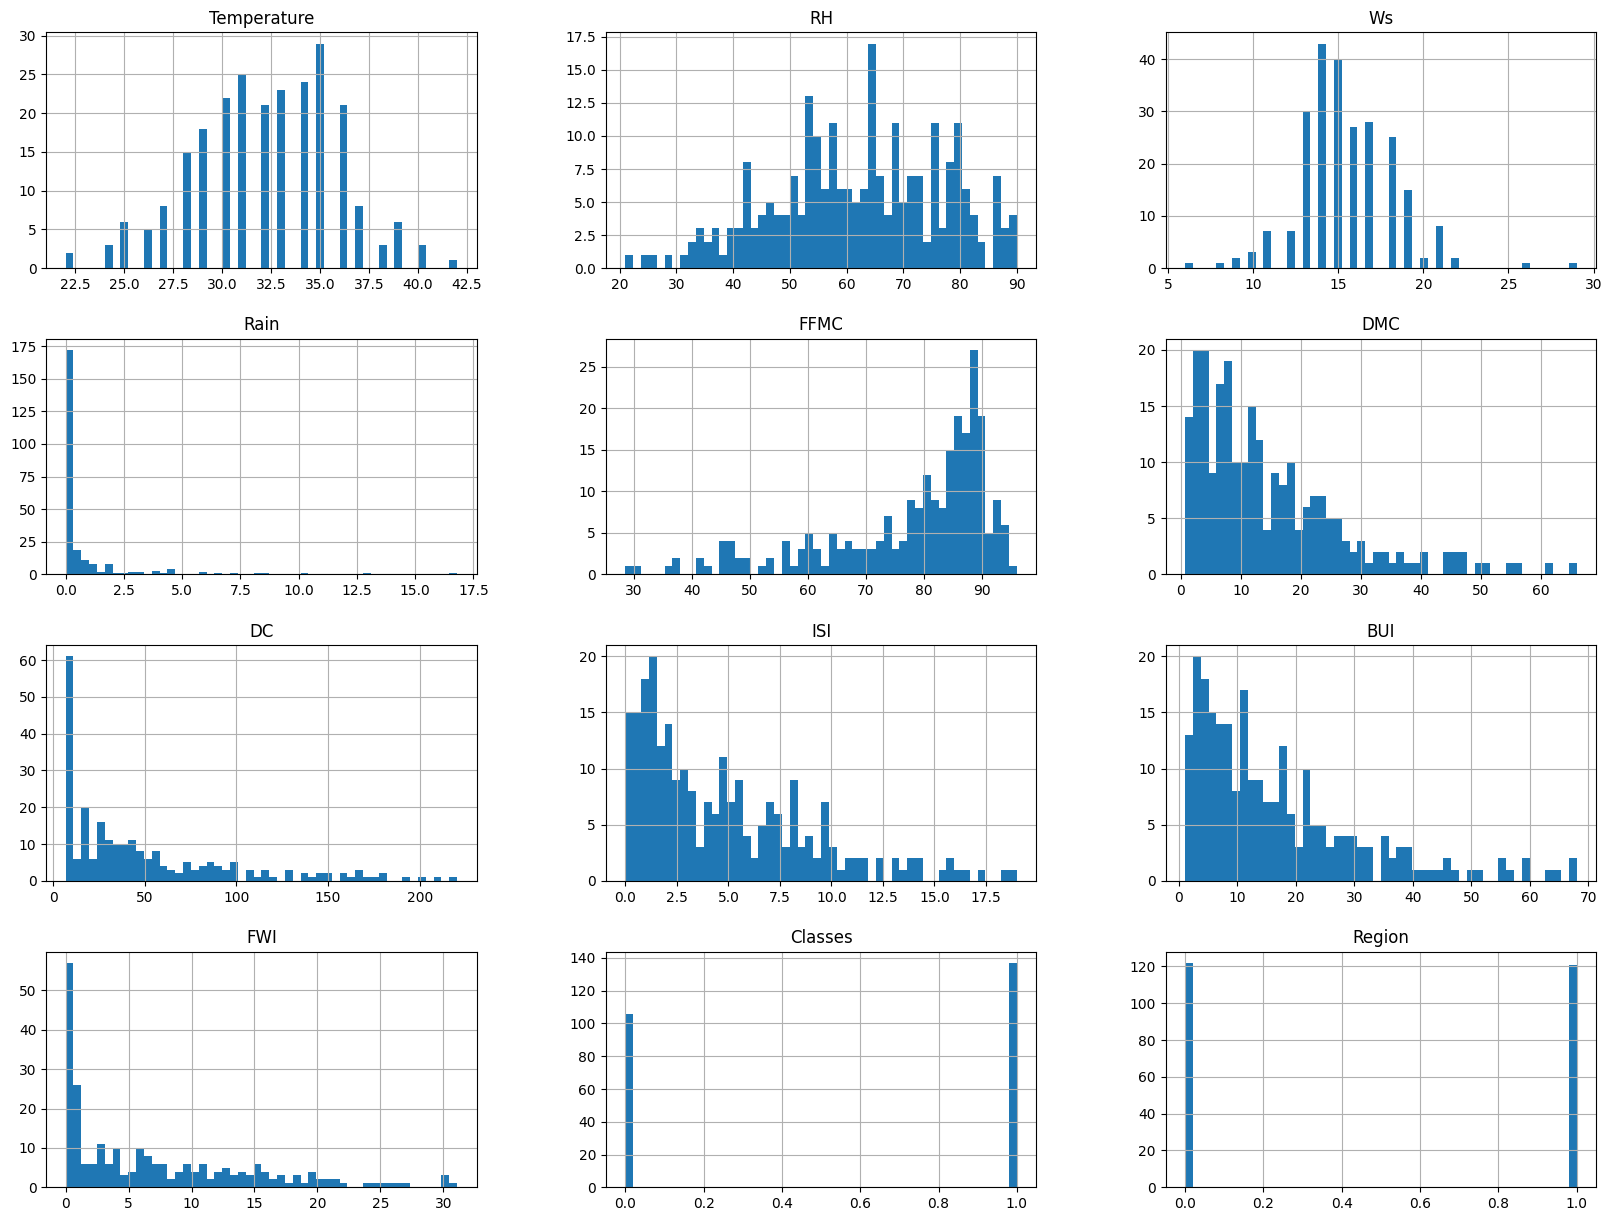

In [30]:
#Plot Density plot for all features
plt.style.use('default')
df_copy.hist(bins=50,figsize=(20,15))
plt.show()

In [31]:
#Plotting a PIE chart
percentage = df_copy['Classes'].value_counts(normalize=True)*100
percentage

Classes
1    56.378601
0    43.621399
Name: proportion, dtype: float64

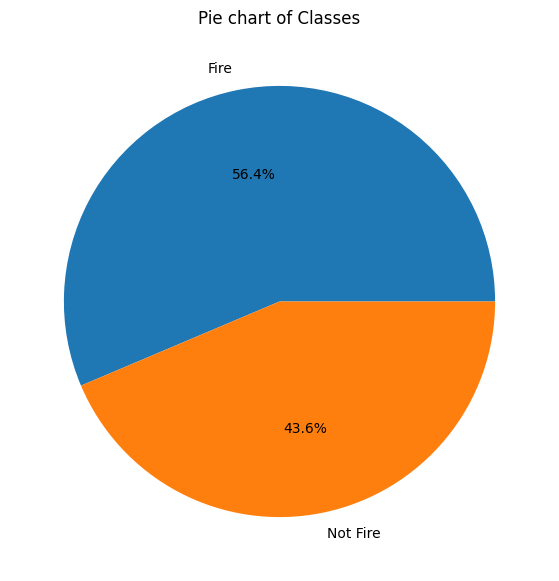

In [32]:
classlabels = ['Fire','Not Fire']
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title("Pie chart of Classes")
plt.show()

In [33]:
#Correlation
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

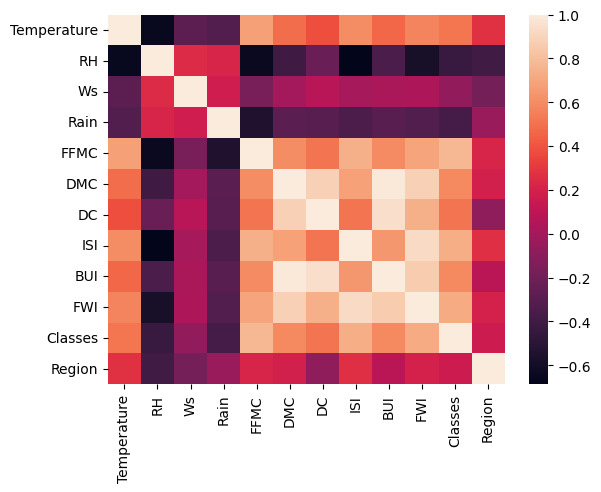

In [34]:
sns.heatmap(df_copy.corr())

In [35]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),'not fire','fire')

Text(0.5, 1.0, 'Fire Analysis of Sidi-Bel and brjaia Regions')

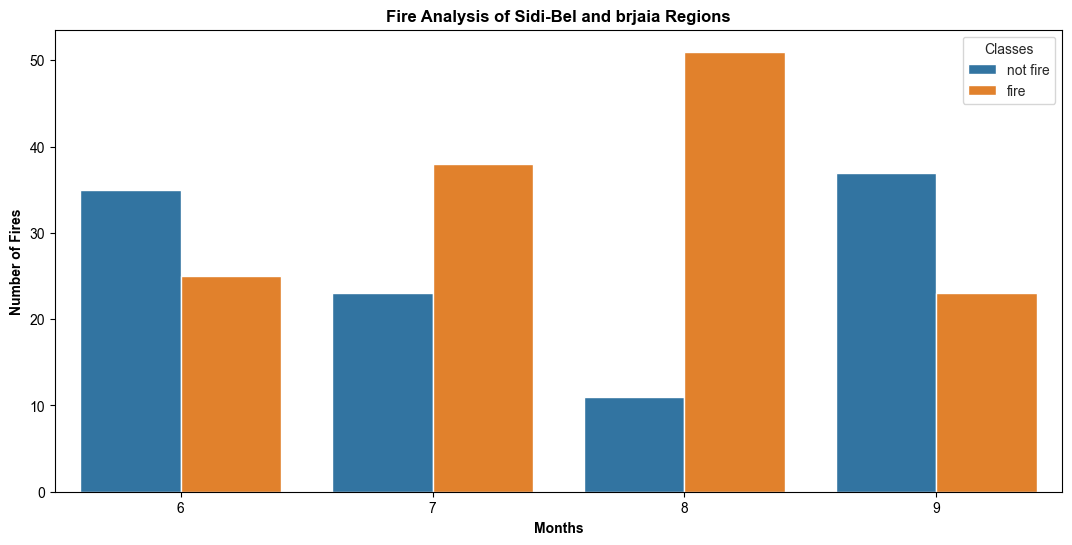

In [36]:
## Monthly Fire Analysis 
dftemp=df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi-Bel and brjaia Regions",weight='bold')

Model Training

In [37]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [38]:
dfnew = pd.read_csv('AlgerianForestFiresCleaned.csv')

In [39]:
dfnew.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [40]:
#drop month day and year
dfnew.drop(['day','month','year'],inplace=True,axis=1)

In [41]:
dfnew.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [42]:
dfnew['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [43]:
#Encoding
dfnew['Classes']=np.where(dfnew['Classes'].str.contains("not fire"),0,1)
dfnew.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [44]:
dfnew.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [45]:
dfnew['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [46]:
#Independent & Dependent Features 
x= dfnew.drop('FWI',axis=1)
y= dfnew['FWI']

In [47]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [48]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [49]:
#Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [50]:
x_train.shape,x_test.shape

((182, 11), (61, 11))

In [51]:
#feature selection based on correaltion
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

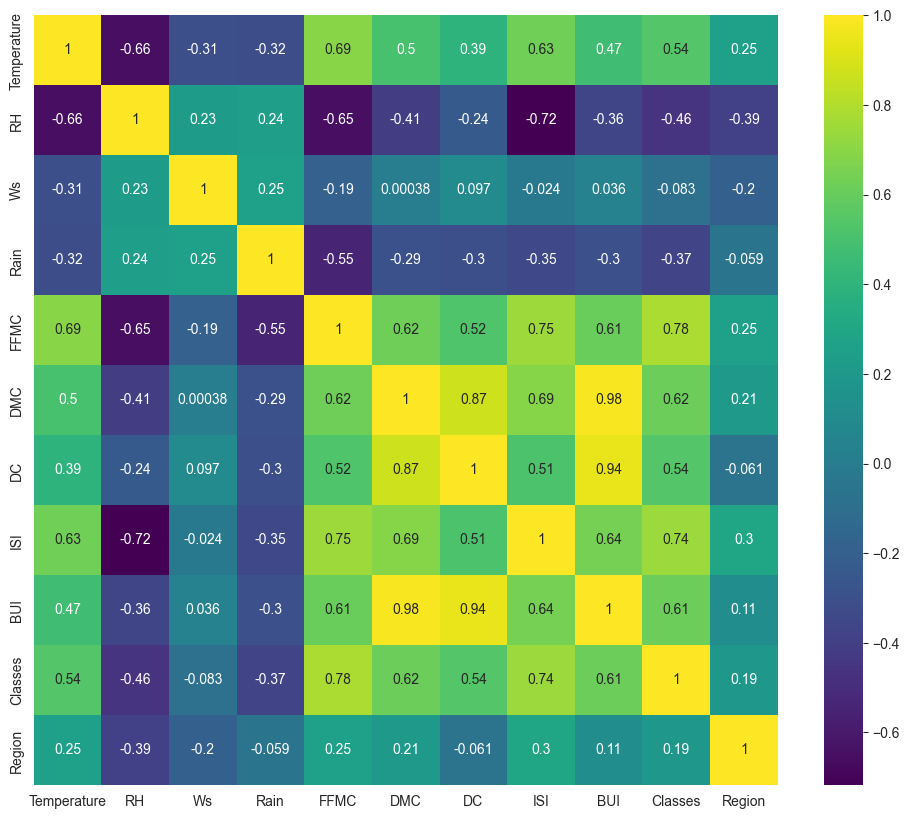

In [52]:
#Check far Multicollinearity 
plt.figure (figsize=(12,10))
corr=x_train.corr()
sns.heatmap(corr,annot=True,cmap='viridis')

In [53]:
def correlation (dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs (corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [54]:
#Threshold Domain expertize
corr_feature = correlation(x_train,0.85)
corr_feature

{'BUI', 'DC'}

In [55]:
#Drop this features when co relation is more than 0.85
x_train.drop(corr_feature,inplace=True,axis=1)
x_test.drop(corr_feature,inplace=True,axis=1)
x_train.shape,x_test.shape

((182, 9), (61, 9))

In [56]:
#Feature Scaling or Standardization
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [57]:
x_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

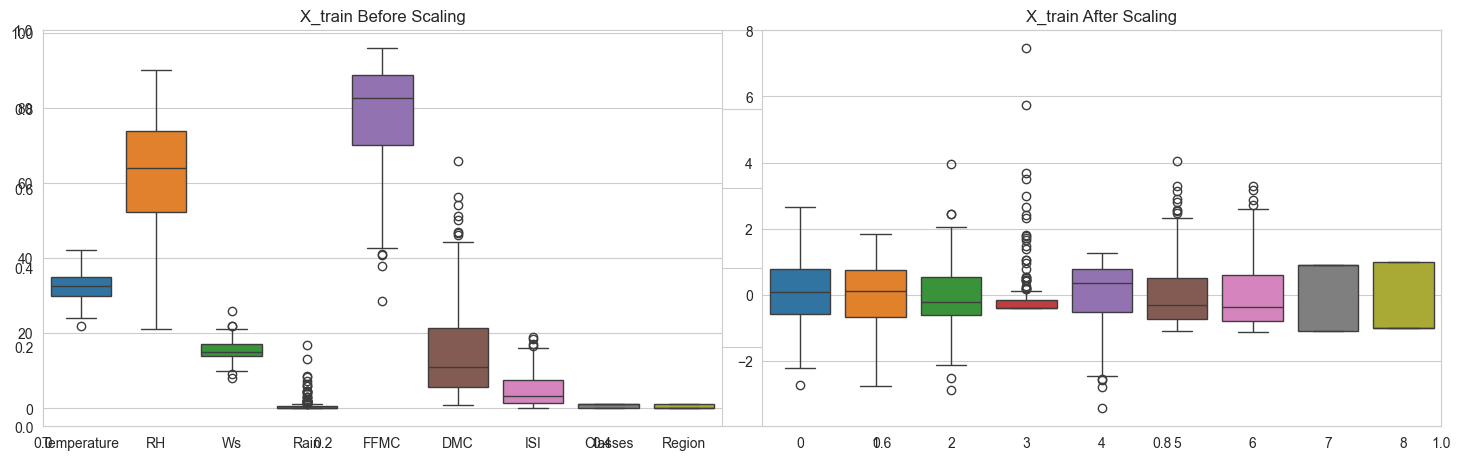

In [58]:
#BoxPLots To Understand Effect of Standard Scaler
plt.subplots (figsize=(15, 5))
plt.subplot (1, 2, 1) 
sns.boxplot(data=x_train)
plt.title('X_train Before Scaling')
plt.subplot (1, 2, 2)
sns.boxplot(data=x_train_scaled)
plt.title( 'X_train After Scaling')
plt.tight_layout()

Linear regression Model

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [60]:
linreg = LinearRegression()
linreg.fit(x_train_scaled,y_train)
y_pred = linreg.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.5468236465249978
R2 Score 0.9847657384266951


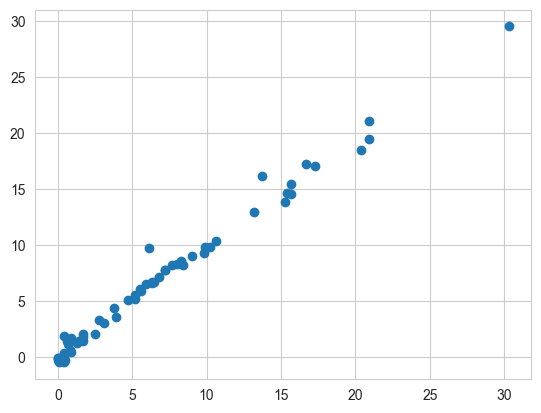

In [61]:
plt.scatter(y_test,y_pred)

Lasso Regression

Mean absolute error 1.133175994914409
R2 Score 0.9492020263112388


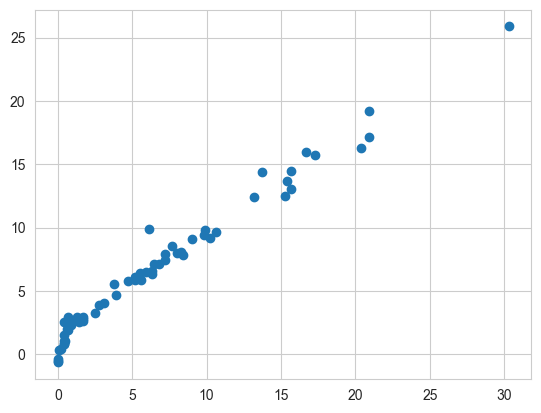

In [62]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score
lasso = Lasso()
lasso.fit(x_train_scaled,y_train)
y_pred = lasso.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Ridge Regression 

Mean absolute error 0.5642305340105715
R2 Score 0.9842993364555512


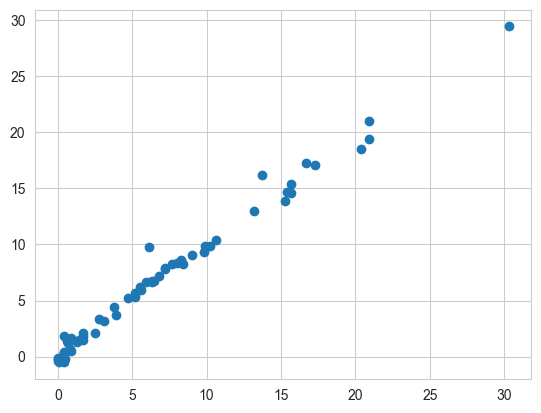

In [63]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score
ridge = Ridge()
ridge.fit(x_train_scaled,y_train)
y_pred = ridge.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Elastic Net Regression

Mean absolute error 1.8822353634896005
R2 Score 0.8753460589519703


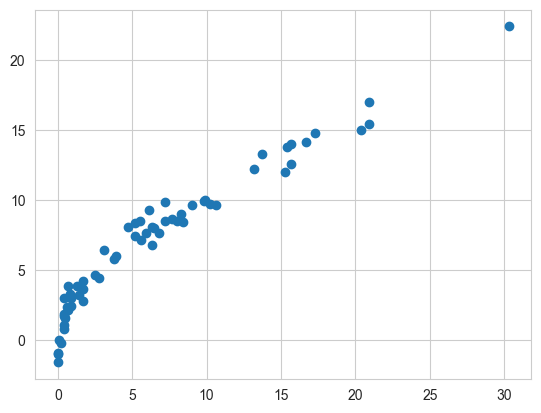

In [64]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score
en = ElasticNet()
en.fit(x_train_scaled,y_train)
y_pred = en.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Cross Validation Lasso

Mean absolute error 0.619970115826343
R2 Score 0.9820946715928275


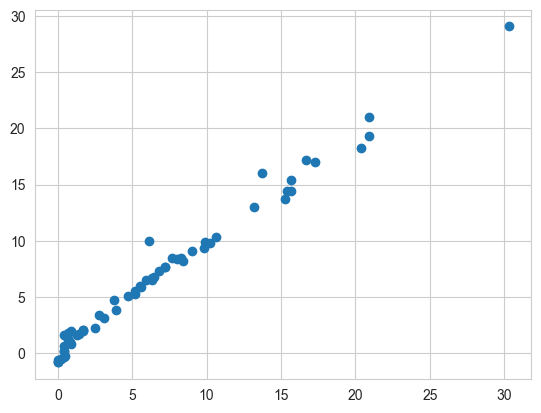

In [65]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error, r2_score
lcv = LassoCV()
lcv.fit(x_train_scaled,y_train)
y_pred = lcv.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Cross Validation Reige

Mean absolute error 0.5642305340106358
R2 Score 0.9842993364555516


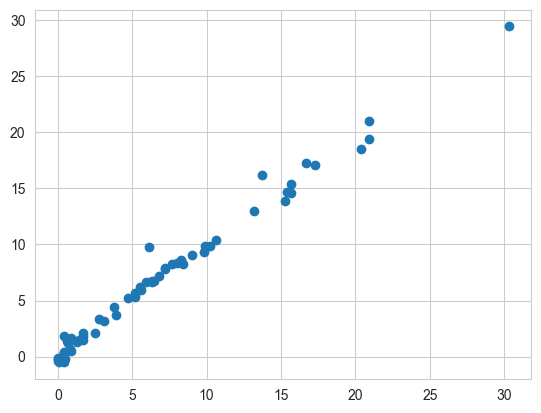

In [66]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error, r2_score
rcv = RidgeCV()
rcv.fit(x_train_scaled,y_train)
y_pred = rcv.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score) 
plt.scatter(y_test,y_pred)

Cross Validation ElasticNet

Mean absolute error 0.5642305340106358
R2 Score 0.9842993364555516


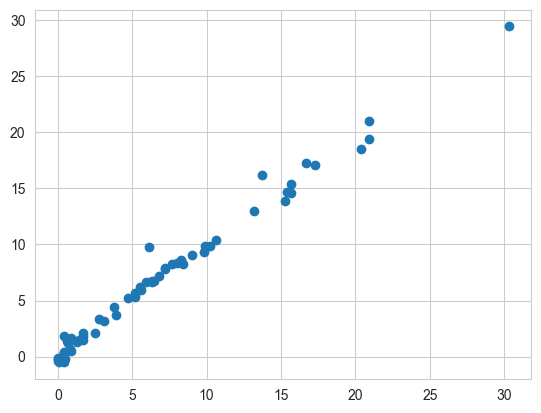

In [67]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error, r2_score
encv = RidgeCV()
encv.fit(x_train_scaled,y_train)
y_pred = encv.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score) 
plt.scatter(y_test,y_pred)

In [68]:
import joblib

In [69]:
# Use your trained Linear Regression model
best_model = linreg  

# Save it
joblib.dump(best_model, "linear_regression_model.pkl")
print("✅ Linear Regression model saved as linear_regression_model.pkl")

✅ Linear Regression model saved as linear_regression_model.pkl
